# Simulating and studying an AR process

In [2]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar
from tqdm import trange

In [11]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [19]:
model1 = ar.AutoRegressive(steps=10_0000, paths=5, a=np.array([0.2, 0.5, -0.4, 0.2, 0.1, 0.3]))

data = model1.generate()

100%|██████████| 99995/99995 [00:00<00:00, 250039.90it/s]

5 different AR(5) processes of 99997 steps have been generated with increments following normal distribution


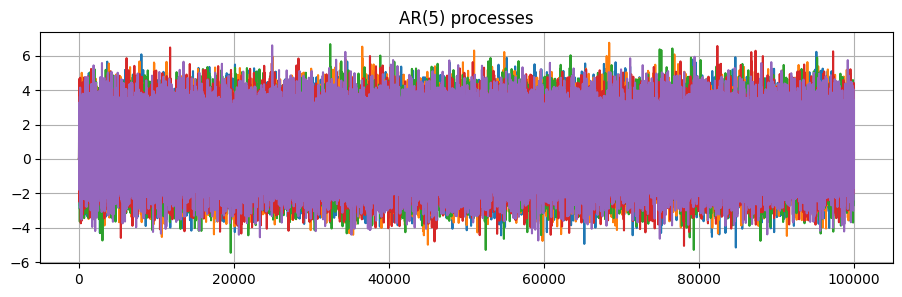

In [20]:
model1.plot_paths()

In [21]:
coefficients = model1.fit_ar()
df(coefficients).head()

,0,1,2,3,4
0,0.199927,0.201800,0.201281,0.196476,0.198066
1,0.500944,0.504181,0.501128,0.499871,0.497509
2,-0.399080,-0.402383,-0.399820,-0.395996,-0.402173
3,0.202105,0.197928,0.202206,0.199393,0.201030
4,0.097939,0.100920,0.099250,0.103274,0.102166


In [25]:
errors = model1.get_errors()

df(errors[5:,:]).describe()


100%|██████████| 99995/99995 [00:00<00:00, 233206.31it/s]


,0,1,2,3,4
count,99995.000000,99995.000000,99995.000000,99995.000000,99995.000000
mean,-0.000113,0.000022,0.000002,-0.000076,-0.000096
std,1.342800,1.349496,1.347693,1.343210,1.344868
min,-5.826500,-5.669262,-6.129286,-5.725839,-5.411296
25%,-0.904693,-0.909283,-0.907229,-0.908290,-0.904067
50%,0.001980,-0.001268,0.002087,0.004904,0.001123
75%,0.905000,0.911438,0.917594,0.906097,0.904563
max,5.560224,6.080857,6.011673,5.905333,5.942123
